In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
ls -alt ../*.xlsx

-rwxrwxrwx 1 ldhagen ldhagen  53587 Jul  7 16:36 '../Texas Hospital Capacity over Time by TSA Region.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen  30566 Jul  7 16:36 '../Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen 127443 Jul  7 16:36 '../Cumulative Tests over Time by County.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen  82895 Jul  7 16:36 '../Texas COVID-19 Active Case Data by County.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen 113363 Jul  7 16:36 '../Texas COVID-19 Fatality Count Data by County.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen 138184 Jul  7 16:36 '../Texas COVID-19 Case Count Data by County.xlsx'*


In [39]:
df_Texas_Covid_case = pd.read_excel("../Texas Hospital Capacity over Time by TSA Region.xlsx", header=2)

In [40]:
df_Texas_Covid_case.index

RangeIndex(start=0, stop=23, step=1)

In [41]:
a = df_Texas_Covid_case.set_index('TSA AREA')

In [42]:
a.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, TSA ID to 2020-07-07
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Amarillo                 88 non-null     object
 1   Lubbock                  88 non-null     object
 2   Wichita Falls            88 non-null     object
 3   Abilene                  88 non-null     object
 4   Dallas/Ft. Worth         88 non-null     object
 5   Paris                    88 non-null     object
 6   Longview/Tyler           88 non-null     object
 7   Lufkin                   88 non-null     object
 8   El Paso                  88 non-null     object
 9   Midland/Odessa           88 non-null     object
 10  San Angelo               88 non-null     object
 11  Belton/Killeen           88 non-null     object
 12  Waco                     88 non-null     object
 13  Bryan/College Station    88 non-null     object
 14  Austin                   88 non-null

In [46]:
a.T['Statewide Total']

TSA ID        Total
2020-04-12    21550
2020-04-13    20588
2020-04-14    21198
2020-04-15    21816
              ...  
2020-07-03    12134
2020-07-04    12907
2020-07-05    13307
2020-07-06    12852
2020-07-07    12925
Name: Statewide Total, Length: 88, dtype: object

In [15]:
a.T['Statewide Total'][1:].index[0]

'2020-04-12'

In [16]:
count = 0
dated_dict = {}
for x in a.T['Statewide Total'][1:]:
#    print(a.T['Statewide Total'][1:].index[count], x)
    dated_dict[a.T['Statewide Total'][1:].index[count]] = x
    count += 1

In [18]:
a.index

Index(['Amarillo', 'Lubbock', 'Wichita Falls', 'Abilene', 'Dallas/Ft. Worth',
       'Paris', 'Longview/Tyler', 'Lufkin', 'El Paso', 'Midland/Odessa',
       'San Angelo', 'Belton/Killeen', 'Waco', 'Bryan/College Station',
       'Austin', 'San Antonio', 'Houston', 'Galveston', 'Victoria', 'Laredo',
       'Corpus Christi', 'Lower Rio Grande Valley', 'Statewide Total'],
      dtype='object', name='TSA AREA')

In [47]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Available Beds'])

In [48]:
c = dated_df.set_index('Date')

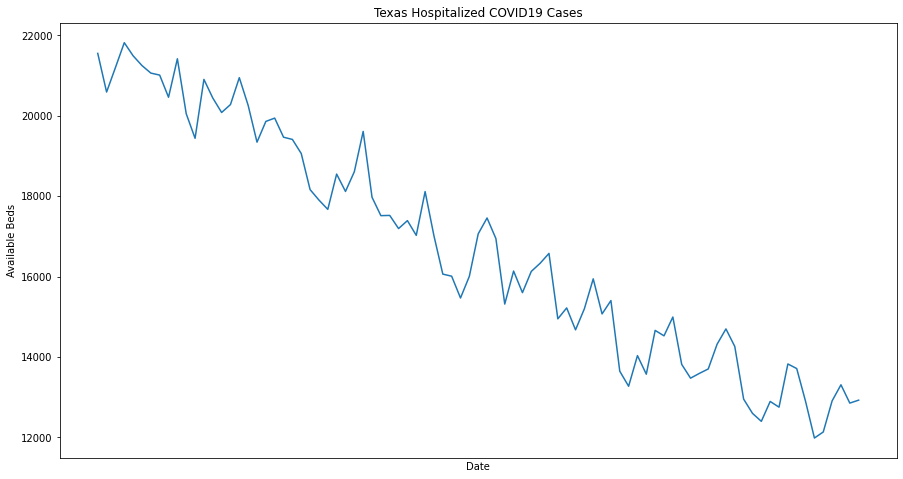

In [49]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Available Beds',color='black')
plt.plot(c)
plt.title('Texas Hospitalized COVID19 Cases')
plt.savefig('Texas Hospitalized.png')

In [50]:
c

,Available Beds
Date,
2020-04-12,21550
2020-04-13,20588
2020-04-14,21198
2020-04-15,21816
2020-04-16,21489
...,...
2020-07-03,12134
2020-07-04,12907
2020-07-05,13307


In [51]:
x = c.diff(periods = 1)

In [52]:
x.rename(columns={'Hospitalized':'Daily Change'}, inplace=True)

In [55]:
x_7day_moving= x.rolling(7).mean().shift()

In [56]:
x_7day_moving

,Available Beds
Date,
2020-04-12,NaN
2020-04-13,NaN
2020-04-14,NaN
2020-04-15,NaN
2020-04-16,NaN
...,...
2020-07-03,-87.714286
2020-07-04,-37.714286
2020-07-05,2.000000


KeyError: 'Daily Change'

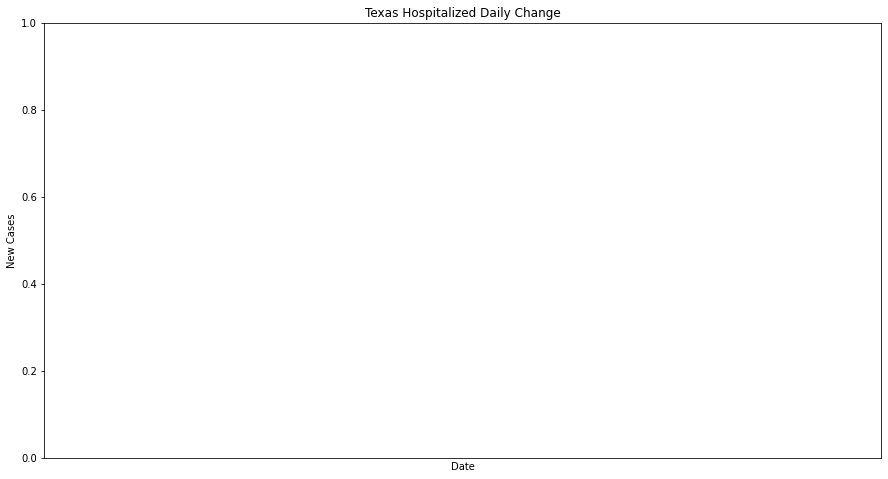

In [54]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('New Cases',color='black')
plt.title('Texas Hospitalized Daily Change')
plt.bar(x.index,x['Daily Change'])
plt.plot(x_7day_moving, 'ro-')
plt.legend(['7 Day Rolling Average','Daily Case Change'])
fig.savefig('TexasrHospChangeDaily.png')

In [42]:
x

,Daily Change
Date,
2020-04-12,NaN
2020-04-13,-162.0
2020-04-14,233.0
2020-04-15,159.0
2020-04-16,-109.0
...,...
2020-07-03,270.0
2020-07-04,238.0
2020-07-05,291.0


In [43]:
x[x['Daily Change'] > 515]


,Daily Change
Date,
2020-06-30,620.0
2020-07-06,517.0
2020-07-07,588.0
